###  PART 1 - DECISION TREE

##  Decision Tree Classifier - Model Overview

In this section, I trained and evaluated a Decision Tree classifier to predict whether a customer will wait for a table at a restaurant. 

I start by:
- **Loading the training and test datasets** (`restaurant_train.csv` and `restaurant_test.csv`)
- **Preprocessing the data** using:
  - One-hot encoding for categorical features
  - Imputation (most frequent strategy) for numeric features
- **Training multiple Decision Tree models** with different hyperparameter combinations:
  - `criterion`: `'gini'` and `'entropy'`
  - `max_depth`: 3, 5, and 10
- For each model, I:
  - Predict on the test set
  - Compute Precision, Recall, and F1 Score
- Finally, I:
  - Display a table comparing all model results
  - Highlight the best-performing model
  - Show its confusion matrix and classification report



Results Table:
  Criterion  Max Depth  Precision  Recall  F1 Score
4   entropy          5     0.6643  0.6250    0.6352
3   entropy          3     0.7481  0.6250    0.6296
5   entropy         10     0.5833  0.5833    0.5833
1      gini          5     0.5828  0.5417    0.5541
0      gini          3     0.6519  0.5417    0.5472
2      gini         10     0.5000  0.5000    0.5000

Best Model:
Criterion    entropy
Max Depth          5
Precision     0.6643
Recall         0.625
F1 Score      0.6352
Name: 4, dtype: object

Confusion Matrix:
[[10  6]
 [ 3  5]]

Classification Report:
              precision    recall  f1-score   support

          No       0.77      0.62      0.69        16
         Yes       0.45      0.62      0.53         8

    accuracy                           0.62        24
   macro avg       0.61      0.62      0.61        24
weighted avg       0.66      0.62      0.64        24



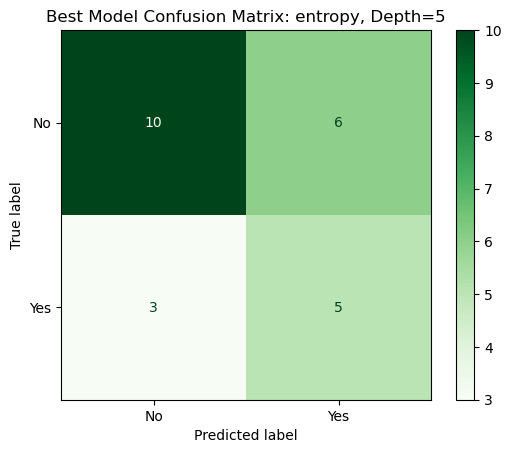

In [7]:
# Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('restaurant_train.csv')
test_df = pd.read_csv('restaurant_test.csv')

X_train_raw = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test_raw = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# Preprocessing
categorical_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_raw.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='most_frequent'), numeric_cols)
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Hyperparameter grid
criteria = ['gini', 'entropy']
depths = [3, 5, 10]

results = []

# Loop through combinations
for criterion in criteria:
    for depth in depths:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Criterion': criterion,
            'Max Depth': depth,
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Print results
print("\nResults Table:")
print(results_df)

# Best model info
best = results_df.iloc[0]
print("\nBest Model:")
print(best)

# Train and evaluate best model
clf_best = DecisionTreeClassifier(criterion=best['Criterion'], max_depth=best['Max Depth'], random_state=42)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

# Confusion matrix and report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Plot
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=clf_best.classes_)
disp.plot(cmap='Greens') 
plt.title(f'Best Model Confusion Matrix: {best["Criterion"]}, Depth={best["Max Depth"]}')
plt.show()



##  Decision Tree Results Table

| Criterion | Max Depth | Precision | Recall | F1 Score |
|-----------|-----------|-----------|--------|----------|
| **entropy** | **5**         | **0.6643**   | **0.6250** | **0.6352** |
| entropy   | 3         | 0.7481    | 0.6250 | 0.6296   |
| entropy   | 10        | 0.5833    | 0.5833 | 0.5833   |
| gini      | 5         | 0.5828    | 0.5417 | 0.5541   |
| gini      | 3         | 0.6519    | 0.5417 | 0.5472   |
| gini      | 10        | 0.5000    | 0.5000 | 0.5000   |

 *Best model based on F1 Score: `DecisionTreeClassifier(criterion='entropy', max_depth=5)`*

---

##  Best Model Performance Summary

### Confusion Matrix

|               | Predicted No | Predicted Yes |
|---------------|--------------|----------------|
| **Actual No**  |      10      |        6       |
| **Actual Yes** |      3       |        5       |

### Classification Report

| Class | Precision | Recall | F1 Score | Support |
|-------|-----------|--------|----------|---------|
| No    | 0.77      | 0.62   | 0.69     | 16      |
| Yes   | 0.45      | 0.62   | 0.53     | 8       |
| **Accuracy**     |           |         | **0.62**  | **24** |
| Macro Avg        | 0.61      | 0.62    | 0.61     | 24      |
| Weighted Avg     | 0.66      | 0.62    | 0.64     | 24      |


###  PART 2 SUPPORT VECTOR MACHINE

##  Support Vector Machine (SVM) - Model Overview

In this section, I applied a Support Vector Machine (SVM) to classify whether a customer will wait for a table at a restaurant. 

I followed a similar structure to the Decision Tree section:

- **Load and preprocess the data**:
  - One-hot encode categorical features
  - Impute missing numeric values using the most frequent strategy
- **Train SVM models** using different combinations of:
  - `kernel`: `'linear'`, `'rbf'`
  - `C`: 0.1, 0.5, 1.0
- For each model, I:
  - Predict on the test set
  - Compute and record Precision, Recall, and F1 Score
- Finally, we:
  - Display a table of all model results (highlighting the best)
  - Show the confusion matrix and classification report for the top-performing model



 Results Table:
   Kernel    C  Precision  Recall  F1 Score
1  linear  0.5     0.7185  0.7083    0.7122
2  linear  1.0     0.6667  0.6667    0.6667
0  linear  0.1     0.6370  0.6250    0.6300
4     rbf  0.5     0.6134  0.6250    0.6182
5     rbf  1.0     0.5833  0.5833    0.5833
3     rbf  0.1     0.4444  0.6667    0.5333

 Best Model:
Kernel       linear
C               0.5
Precision    0.7185
Recall       0.7083
F1 Score     0.7122
Name: 1, dtype: object

Confusion Matrix:
[[12  4]
 [ 3  5]]

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.75      0.77        16
         Yes       0.56      0.62      0.59         8

    accuracy                           0.71        24
   macro avg       0.68      0.69      0.68        24
weighted avg       0.72      0.71      0.71        24



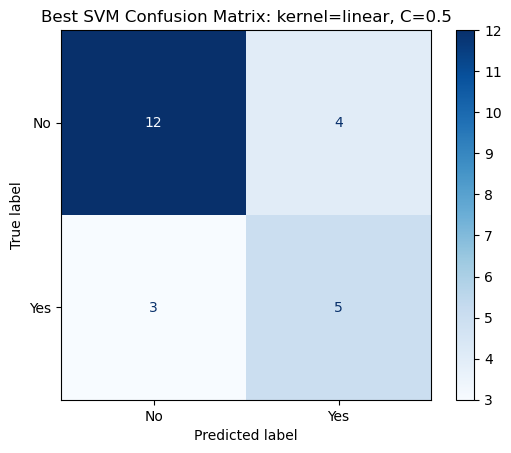

In [18]:
#  SVM Classifier with Hyperparameter Tuning and Evaluation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

#  Load training and test data
train_df = pd.read_csv('restaurant_train.csv')
test_df = pd.read_csv('restaurant_test.csv')

X_train_raw = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test_raw = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

#  Preprocessing: One-hot encode categorical, impute numeric
categorical_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_raw.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='most_frequent'), numeric_cols)
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

#  Hyperparameter grid
kernels = ['linear', 'rbf']
C_values = [0.1, 0.5, 1]

results = []

#  Grid search and evaluation
for kernel in kernels:
    for C in C_values:
        clf = SVC(kernel=kernel, C=C)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append({
            'Kernel': kernel,
            'C': C,
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4)
        })

#  Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\n Results Table:")
print(results_df)

#  Identify best model
best = results_df.iloc[0]
print("\n Best Model:")
print(best)

#  Retrain and evaluate best model
clf_best = SVC(kernel=best['Kernel'], C=best['C'])
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

#  Confusion Matrix and Report
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

#  Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_best.classes_)
disp.plot(cmap='Blues')
plt.title(f'Best SVM Confusion Matrix: kernel={best["Kernel"]}, C={best["C"]}')
plt.show()


##  Support Vector Machine - Results Table

| Kernel | C    | Precision | Recall | F1 Score |
|--------|------|-----------|--------|----------|
| **linear** | **0.5**  | **0.7185**   | **0.7083** | **0.7122** |
| linear | 1.0  | 0.6667    | 0.6667 | 0.6667   |
| linear | 0.1  | 0.6370    | 0.6250 | 0.6300   |
| rbf    | 0.5  | 0.6134    | 0.6250 | 0.6182   |
| rbf    | 1.0  | 0.5833    | 0.5833 | 0.5833   |
| rbf    | 0.1  | 0.4444    | 0.6667 | 0.5333   |

 *Best model based on F1 Score: `SVC(kernel='linear', C=0.5)`*

---

##  Best Model Performance Summary

### Confusion Matrix

|               | Predicted No | Predicted Yes |
|---------------|--------------|----------------|
| **Actual No**  |      12      |        4       |
| **Actual Yes** |      3       |        5       |

### Classification Report

| Class | Precision | Recall | F1 Score | Support |
|-------|-----------|--------|----------|---------|
| No    | 0.80      | 0.75   | 0.77     | 16      |
| Yes   | 0.56      | 0.62   | 0.59     | 8       |
| **Accuracy**     |           |         | **0.71**  | **24** |
| Macro Avg        | 0.68      | 0.69    | 0.68     | 24      |
| Weighted Avg     | 0.72      | 0.71    | 0.71     | 24      |


###  PART 3 ARTIFICIAL NEURAL NETWORK

##  Artificial Neural Network (ANN) - Model Overview

In this section, I used an Artificial Neural Network (ANN) to classify whether a customer will wait for a table at a restaurant using a Multi-Layer Perceptron (MLP) classifier.

The process includes:

- **Data preparation**:
  - One-hot encoding for categorical variables
  - Imputation for numeric variables using the most frequent strategy

- **Model training and tuning**:
  - We experiment with different configurations of:
    - `hidden_layer_sizes`: (32,), (64, 32), and (128, 256)
    - `activation` functions: `'relu'` and `'tanh'`
    - `learning_rate_init`: 0.001 and 0.01

- **Evaluation**:
  - For each configuration, I evaluated Precision, Recall, and F1 Score
  - I compared the results in a summary table and identify the best-performing model
  - Finally, I displayed the confusion matrix and classification report for the best model



 Results Table:
   Hidden Layers Activation  Learning Rate  Precision  Recall  F1 Score
4       (64, 32)       relu          0.001     0.7185  0.7083    0.7122
5       (64, 32)       relu          0.010     0.7003  0.7083    0.7030
0          (32,)       relu          0.001     0.6667  0.6667    0.6667
1          (32,)       relu          0.010     0.6667  0.6667    0.6667
2          (32,)       tanh          0.001     0.6667  0.6667    0.6667
8     (128, 256)       relu          0.001     0.6667  0.6667    0.6667
9     (128, 256)       relu          0.010     0.6667  0.6667    0.6667
6       (64, 32)       tanh          0.001     0.6134  0.6250    0.6182
7       (64, 32)       tanh          0.010     0.6134  0.6250    0.6182
3          (32,)       tanh          0.010     0.5833  0.5833    0.5833
10    (128, 256)       tanh          0.001     0.5556  0.5833    0.5658
11    (128, 256)       tanh          0.010     0.4877  0.5417    0.5084

 Best Model:
Hidden Layers    (64, 32)
Activat

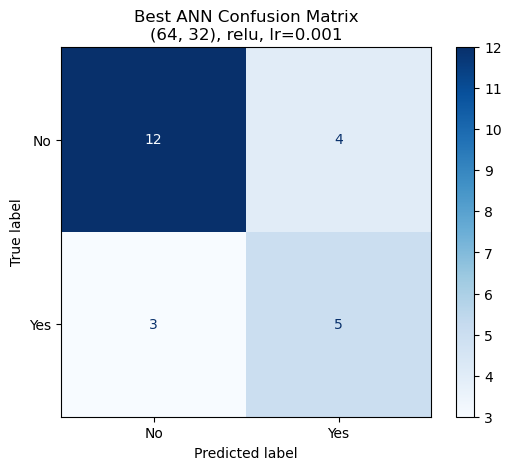

In [24]:
#  Artificial Neural Network (ANN) - MLPClassifier with Tuning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Load and split data
train_df = pd.read_csv('restaurant_train.csv')
test_df = pd.read_csv('restaurant_test.csv')

X_train_raw = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test_raw = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

#  Preprocessing
categorical_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_raw.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='most_frequent'), numeric_cols)
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

#  Define hyperparameter sets
hidden_layer_options = [(32,), (64, 32), (128, 256)]
activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01]

results = []

#  Loop through combinations
for hidden_layers in hidden_layer_options:
    for activation in activations:
        for lr in learning_rates:
            clf = MLPClassifier(
                hidden_layer_sizes=hidden_layers,
                activation=activation,
                solver='adam',
                learning_rate='constant',
                learning_rate_init=lr,
                max_iter=8000,
                random_state=42
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            results.append({
                'Hidden Layers': str(hidden_layers),
                'Activation': activation,
                'Learning Rate': lr,
                'Precision': round(precision, 4),
                'Recall': round(recall, 4),
                'F1 Score': round(f1, 4)
            })

#  Results Table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\n Results Table:")
print(results_df)

#  Best Model
best = results_df.iloc[0]
print("\n Best Model:")
print(best)

#  Retrain best model
best_clf = MLPClassifier(
    hidden_layer_sizes=eval(best['Hidden Layers']),
    activation=best['Activation'],
    solver='adam',
    learning_rate='constant',
    learning_rate_init=best['Learning Rate'],
    max_iter=8000,
    random_state=42
)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

#  Final evaluation
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

#  Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(cmap='Blues')
plt.title(f"Best ANN Confusion Matrix\n{best['Hidden Layers']}, {best['Activation']}, lr={best['Learning Rate']}")
plt.show()


##  Artificial Neural Network - Results Table

| Hidden Layers | Activation | Learning Rate | Precision | Recall | F1 Score |
|---------------|------------|----------------|-----------|--------|----------|
| **(64, 32)**    | **relu**      | **0.001**         | **0.7185**   | **0.7083** | **0.7122** |
| (64, 32)    | relu      | 0.010         | 0.7003    | 0.7083 | 0.7030   |
| (32,)       | relu      | 0.001         | 0.6667    | 0.6667 | 0.6667   |
| (32,)       | relu      | 0.010         | 0.6667    | 0.6667 | 0.6667   |
| (32,)       | tanh      | 0.001         | 0.6667    | 0.6667 | 0.6667   |
| (128, 256)  | relu      | 0.001         | 0.6667    | 0.6667 | 0.6667   |
| (128, 256)  | relu      | 0.010         | 0.6667    | 0.6667 | 0.6667   |
| (64, 32)    | tanh      | 0.001         | 0.6134    | 0.6250 | 0.6182   |
| (64, 32)    | tanh      | 0.010         | 0.6134    | 0.6250 | 0.6182   |
| (32,)       | tanh      | 0.010         | 0.5833    | 0.5833 | 0.5833   |
| (128, 256)  | tanh      | 0.001         | 0.5556    | 0.5833 | 0.5658   |
| (128, 256)  | tanh      | 0.010         | 0.4877    | 0.5417 | 0.5084   |

 *Best model based on F1 Score: `MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', learning_rate_init=0.001)`*

---

##  Best Model Performance Summary

### Confusion Matrix

|               | Predicted No | Predicted Yes |
|---------------|--------------|----------------|
| **Actual No**  |      12      |        4       |
| **Actual Yes** |      3       |        5       |

### Classification Report

| Class | Precision | Recall | F1 Score | Support |
|-------|-----------|--------|----------|---------|
| No    | 0.80      | 0.75   | 0.77     | 16      |
| Yes   | 0.56      | 0.62   | 0.59     | 8       |
| **Accuracy**     |           |         | **0.71**  | **24** |
| Macro Avg        | 0.68      | 0.69    | 0.68     | 24      |
| Weighted Avg     | 0.72      | 0.71    | 0.71     | 24      |



###  Create ZIP Archive

The following code block zips this notebook into a `.zip` file for easy sharing or submission.  
This is useful for uploading to platforms that require compressed files or for keeping a clean archive of your work.


In [3]:
from pathlib import Path
from zipfile import ZipFile

# Define the path to the current notebook
notebook_path = Path("Roy_Phelps.ipynb")  

# Define the zip file name
zip_path = notebook_path.with_suffix(".zip")

# Create the zip file
with ZipFile(zip_path, 'w') as zipf:
    zipf.write(notebook_path, arcname=notebook_path.name)

print(f'ZIP file created: {zip_path.name}')



ZIP file created: Roy_Phelps.zip
